# Evaluación de Data Wrangling en Python para un Data Scientist

El objetivo de esta evaluación es medir tu habilidad para realizar tareas de data wrangling avanzadas en Python utilizando las bibliotecas más comunes, como pandas, NumPy y datetime y matplotlib. Por favor, sigue las instrucciones de cada pregunta.

## Pregunta 1: Importando librerías

1. Importa las siguientes librerías:
    - pandas con el alias `pd`
    - numpy con el alias `np`
    - datetime

In [46]:
import pandas as pd
import numpy as np
import datetime as dt

# Pregunta 2: Cargar, combinar y muestrear archivos CSV

Carga los archivos CSV llamados data1.csv y data2.csv en dos DataFrames de pandas llamados df_test_data_scientist y df_test_data_scientist2, respectivamente.

Concatena df1 y df2 en un único DataFrame llamado df.

Genera una muestra aleatoria del 5% del DataFrame df sin reemplazo y guárdala en un nuevo DataFrame llamado sample_df.

Muestra las primeras 10 filas del DataFrame sample_df.


In [47]:
"""
Primero, importo  google.colab para acceder a los archivos en nuestro Google Drive.
"""
import pandas as pd
from google.colab import drive

"""
Montamos nuestro Google Drive para poder acceder a los archivos CSV almacenados allí.
"""
drive.mount('/content/drive')

"""
Después de montar nuestra unidad, cargamos los archivos CSV en dos DataFrames diferentes, llamados df1 y df2, respectivamente.
Para esto, usamos la función read_csv de pandas y proporcionamos la ruta del archivo en nuestro Google Drive.
"""
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_test_data_scientist.csv')
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_test_data_scientist2.csv')

"""
Luego, combinamos estos dos DataFrames en uno solo, llamado df.
Esto se logra utilizando la función concat de pandas, que permite unir varios DataFrames a lo largo de un eje particular.
"""
df = pd.concat([df1, df2])

"""
Después de combinar nuestros DataFrames, generamos una muestra aleatoria del 5% del DataFrame df sin reemplazo.
Esto se realiza con la función sample de pandas, donde el argumento frac define la fracción de filas a devolver en la muestra aleatoria,
y el argumento replace se establece en False para garantizar que nuestra muestra sea sin reemplazo.
"""
sample_df = df.sample(frac=0.05, replace=False)

"""
Finalmente, mostramos las primeras 10 filas del DataFrame sample_df utilizando la función head de pandas, que por defecto devuelve las primeras 5 filas de un DataFrame,
pero aquí especificamos 10 como argumento para obtener las primeras 10 filas.
"""
print(sample_df.head(5))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      age    income                                    id  \
870  63.0   91131.0  36fd6b12-b071-4e11-9866-71490f5e524b   
972  53.0   76904.0  ddec70c6-8919-4dba-8440-43cde67b08e5   
619  49.0   74503.0  032b8441-7ccc-4790-974e-e60e420acbe7   
805  72.0  105864.0  88b6b3e4-b817-4580-acd3-f81e0b4c57ff   
865   NaN       NaN  8552cc73-1129-4106-8df2-98513995cf61   

                          email        date  \
870    lisagarrison@example.com  2018-08-04   
972     peggysteele@example.net  2018-06-05   
619    simpsonpaula@example.org  2022-05-07   
805        hannah89@example.net  2022-01-06   
865  robertskathryn@example.org  2022-06-12   

                                              comments category      score  \
870  cold east head affect century organization num...        C  45.550384   
972  unit budget area huge send suddenly game so ne...        C  

# Pregunta 3: Limpieza y transformación de datos avanzada
Elimina las filas que contengan valores NaN en la columna 'age'.

Reemplaza los valores negativos en la columna 'income' por 0.

Encuentra y elimina los duplicados en el DataFrame df, teniendo en cuenta las columnas 'id' y 'email'.

Escribe una función que extraiga el dominio del correo electrónico de una cadena de texto y aplícala a la columna 'email' del DataFrame df, guardando los resultados en una nueva columna llamada 'email_domain'.

In [48]:
# Pregunta 3: Limpieza y transformación de datos avanzada

# Elimina las filas que contengan valores NaN en la columna 'age'.
"""
Primero, vamos a eliminar las filas que contienen valores NaN en la columna 'age' utilizando el método dropna() de pandas, pasando el nombre de la columna al argumento 'subset'.
"""
df = df.dropna(subset=['age'])

# Reemplaza los valores negativos en la columna 'income' por 0.
"""
Para reemplazar los valores negativos en la columna 'income' por 0, vamos a utilizar un boolean indexing.
Primero, vamos a crear una serie booleana donde cada valor es Verdadero si el correspondiente valor en la columna 'income' es menor que 0 y Falso si no.
Luego, vamos a utilizar esta serie para indexar el DataFrame y asignar el valor 0 a las celdas correspondientes en la columna 'income'.
"""
df.loc[df['income'] < 0, 'income'] = 0

# Encuentra y elimina los duplicados en el DataFrame df, teniendo en cuenta las columnas 'id' y 'email'.
"""
Para eliminar los duplicados del DataFrame, usamos el método drop_duplicates() de pandas y pasamos una lista de nombres de columnas al argumento 'subset'.
Esta operación eliminará todas las filas que tengan el mismo valor en ambas columnas.
"""
df = df.drop_duplicates(subset=['id', 'email'])

# Escribe una función que extraiga el dominio del correo electrónico de una cadena de texto y aplícala a la columna 'email' del DataFrame df, guardando los resultados en una nueva columna llamada 'email_domain'.
"""
Primero, vamos a definir una función que tome una dirección de correo electrónico como entrada y devuelva el dominio del correo electrónico.
Esta función tomará la dirección de correo electrónico, la dividirá en el carácter '@' y devolverá la segunda parte de la dirección de correo electrónico dividida, que es el dominio.
Luego, aplicaremos esta función a cada valor en la columna 'email' usando el método apply() de pandas y almacenaremos los resultados en una nueva columna 'email_domain'.
"""
def extraer_dominio(email):
    return email.split('@')[1]

df['email_domain'] = df['email'].apply(extraer_dominio)


# Pregunta 4: Manipulación de fechas y horas

Convierte la columna 'date' del DataFrame df a un objeto de tipo datetime.

Extrae el mes, el día de la semana y la hora de la columna 'date' y guárdalos en nuevas columnas llamadas 'month', 'day_of_week' y 'hour', respectivamente.

In [49]:
# Pregunta 4: Manipulación de fechas y horas

# Convierte la columna 'date' del DataFrame df a un objeto de tipo datetime.
"""
Voy a convertir la columna 'date' al tipo de datos datetime utilizando el método to_datetime() de pandas.
Luego, voy a verificar el tipo de datos de la columna 'date' para asegurarme de que se haya realizado la conversión correctamente.
"""
df['date'] = pd.to_datetime(df['date'])

# Extrae el mes, el día de la semana y la hora de la columna 'date' y guárdalos en nuevas columnas llamadas 'month', 'day_of_week' y 'hour', respectivamente.
"""
Ahora, voy a extraer el mes, el día de la semana y la hora de la columna 'date' utilizando los atributos dt.month, dt.dayofweek y dt.hour respectivamente.
Voy a almacenar estos valores en nuevas columnas llamadas 'month', 'day_of_week' y 'hour'.
Finalmente, voy a imprimir las primeras filas del DataFrame para verificar que se hayan creado las nuevas columnas correctamente.
"""
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour


# Pregunta 5: One-hot encoding y normalización

Supongamos que el DataFrame df tiene una columna categórica llamada 'category', y una columna numérica llamada 'score'.

Realiza one-hot encoding para la columna 'category' y añade las nuevas columnas al DataFrame df.
Normaliza la columna 'score' utilizando la técnica de Min-Max scaling, es decir, transforma los valores de la columna para que estén en el rango de 0 a 1.

In [50]:
#Pregunta 5: One-hot encoding y normalización
#Supongamos que el DataFrame df tiene una columna categórica llamada 'category', y una columna numérica llamada 'score'.
#Realiza one-hot encoding para la columna 'category' y añade las nuevas columnas al DataFrame df.
#Normaliza la columna 'score' utilizando la técnica de Min-Max scaling, es decir, transforma los valores de la columna para que estén en el rango de 0 a 1.

# Creando un DataFrame de ejemplo para ilustrar los procesos.
df = pd.DataFrame({
    'category': ['cat1', 'cat2', 'cat3', 'cat2', 'cat1', 'cat3'],
    'score': [34, 45, 76, 78, 99, 34]
})

"""
Voy a realizar un one-hot encoding en la columna 'category'.
Esta técnica convertirá cada categoría única en su propia columna binaria.
"""
df = pd.get_dummies(df, columns=['category'])

"""
A continuación, voy a normalizar la columna 'score' utilizando la técnica de Min-Max scaling.
Esto ajustará los valores de 'score' para que estén en el rango de 0 a 1.
"""
df['score'] = (df['score'] - df['score'].min()) / (df['score'].max() - df['score'].min())

print(df)



      score  category_cat1  category_cat2  category_cat3
0  0.000000              1              0              0
1  0.169231              0              1              0
2  0.646154              0              0              1
3  0.676923              0              1              0
4  1.000000              1              0              0
5  0.000000              0              0              1


# Pregunta 6: Análisis de correlación

*   Elemento de lista
*   Elemento de lista



Calcula el coeficiente de correlación de Pearson entre la columna 'income' y todas las otras columnas numéricas del DataFrame df.
Muestra un DataFrame con los coeficientes de correlación de Pearson en orden descendente.

In [58]:
# Pregunta 6: Análisis de correlación
# Calcula el coeficiente de correlación de Pearson entre la columna 'income' y todas las otras columnas numéricas del DataFrame df.
#Muestra un DataFrame con los coeficientes de correlación de Pearson en orden descendente.
"""
Primero, me aseguro de que la columna 'income' exista en mis DataFrames df1 y df2. Si no es así, reemplazo 'income' con el nombre de mi columna numérica.
Voy a calcular la correlación de Pearson de la columna 'income' con todas las otras columnas numéricas en mis DataFrames.
Esto me ayudará a entender qué otras variables están más estrechamente relacionadas con 'income'.
"""
correlation_df1 = df1.corr()['income'].sort_values(ascending=False)
correlation_df2 = df2.corr()['income'].sort_values(ascending=False)
print(correlation_df1)
print(correlation_df2)
"""
Después de calcular las correlaciones, las ordeno en orden descendente.
Esto hace que sea fácil ver qué variables tienen la mayor correlación con 'income'.
"""


income                        1.000000
age                           0.994544
longitude                     0.052995
latitude                      0.041705
count_unique_customers        0.012671
count_unique_products_sold   -0.009234
sales                        -0.012568
revenue                      -0.012631
score                        -0.034281
Name: income, dtype: float64
income                        1.000000
age                           0.994265
longitude                     0.029247
count_unique_customers        0.025575
latitude                      0.011346
count_unique_products_sold    0.000888
revenue                      -0.010440
sales                        -0.015506
score                        -0.021795
Name: income, dtype: float64


<ipython-input-58-b303d7dcfa73>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df1 = df1.corr()['income'].sort_values(ascending=False)
<ipython-input-58-b303d7dcfa73>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df2 = df2.corr()['income'].sort_values(ascending=False)


"\nDespués de calcular las correlaciones, las ordeno en orden descendente.\nEsto hace que sea fácil ver qué variables tienen la mayor correlación con 'income'.\n"

# Pregunta 7: Creación y aplicación de funciones personalizadas

El DataFrame df tiene una columna llamada 'comment' que contiene cadenas de texto.

Escribe una función que cuente la cantidad de palabras en una cadena de texto.
Aplica la función a la columna 'comment' del DataFrame df y guarda los resultados en una nueva columna llamada 'word_count'.
Encuentra y muestra las 5 filas con el mayor 'word_count'.

In [59]:
"""
Primero, definamos una función que cuente las palabras en una cadena de texto. Esta función se llama 'count_words' y toma una cadena de texto como argumento.
"""
def count_words(text):
    # Divido el texto en palabras y luego cuento la cantidad de palabras.
    return len(text.split())

"""
Ahora, apliquemos esta función a la columna 'comment' del DataFrame df. Esto creará una nueva columna llamada 'word_count' que contendrá la cantidad de palabras de cada comentario.
"""
df1['word_count'] = df1['comment'].apply(count_words)

"""
Finalmente, vamos a encontrar y mostrar las 5 filas con el mayor conteo de palabras en 'comment'. Para hacer esto, ordeno el DataFrame df en orden descendente por 'word_count' y muestro las primeras 5 filas.
"""
top5_word_count = df1.sort_values('word_count', ascending=False).head(5)
print("Estas son las 5 filas con la mayor cantidad de palabras en 'comment':\n")
print(top5_word_count)


KeyError: ignored

# Pregunta 8: Agrupamiento por múltiples columnas y filtrado

Supongamos que el DataFrame df tiene tres columnas: 'category', 'subcategory' y 'sales'.

Agrupa el DataFrame df por las columnas 'category' y 'subcategory'.
Calcula la suma de 'sales' para cada grupo.
Filtra los resultados para mostrar únicamente aquellos grupos que tengan una suma de 'sales' mayor a 1000.
Muestra el resultado en un nuevo DataFrame.

In [57]:
# Pregunta 8: Agrupamiento por múltiples columnas y filtrado
# Supongamos que el DataFrame df tiene tres columnas: 'category', 'subcategory' y 'sales'.
# Agrupa el DataFrame df por las columnas 'category' y 'subcategory'. Calcula la suma de 'sales' para cada grupo.
"""
Primero, agrupo el DataFrame df por las columnas 'category' y 'subcategory' utilizando el método groupby().
Luego, calculo la suma de 'sales' para cada grupo utilizando el método sum().
El resultado de estas operaciones se guarda en un nuevo DataFrame llamado df_grouped.
"""
df_grouped = df.groupby(['category', 'subcategory'])['sales'].sum()

# Filtra los resultados para mostrar únicamente aquellos grupos que tengan una suma de 'sales' mayor a 1000. Muestra el resultado en un nuevo DataFrame.
"""
A continuación, filtro el DataFrame df_grouped para mostrar sólo los grupos que tienen una suma de 'sales' mayor a 1000.
Utilizo la función loc para hacer esto, que me permite seleccionar filas por etiqueta.
Imprimo el DataFrame resultante para verificar los resultados.
"""
df_filtered = df_grouped.loc[df_grouped > 1000]
print(df_filtered)


KeyError: ignored

# Pregunta 9: Filtrado de filas en función de una lista

Supongamos que el DataFrame df tiene una columna llamada 'city' y una columna numérica llamada 'population'.

Crea una lista de ciudades de interés, por ejemplo: cities_of_interest = ['New York', 'Los Angeles', 'Chicago'].
Filtra el DataFrame df para mostrar únicamente las filas cuya columna 'city' esté en la lista cities_of_interest.
Muestra las primeras 10 filas del DataFrame filtrado.

In [ ]:
# Pregunta 9: Filtrado de filas en función de una lista
# Supongamos que el DataFrame df tiene una columna llamada 'city' y una columna numérica llamada 'population'.
# Crea una lista de ciudades de interés, por ejemplo: cities_of_interest = ['New York', 'Los Angeles', 'Chicago'].
"""
Primero, crearé una lista de ciudades de interés. Luego, crearé un filtro que verifica si la columna 'city' de df está en esta lista.
El filtro será una Serie de booleanos, donde True indica que la ciudad está en la lista de ciudades de interés.
"""
cities_of_interest = ['New York', 'Los Angeles', 'Chicago']
filter = df['city'].isin(cities_of_interest)
# Filtra el DataFrame df para mostrar únicamente las filas cuya columna 'city' esté en la lista cities_of_interest.
"""
A continuación, aplicaré el filtro a df para seleccionar sólo las filas que corresponden a las ciudades de interés.
Guardo este DataFrame filtrado en una nueva variable df_filtered.
"""
df_filtered = df[filter]
# Muestra las primeras 10 filas del DataFrame filtrado.
"""
Finalmente, muestro las primeras 10 filas de df_filtered utilizando el método head().
Este método devuelve las primeras n filas de un DataFrame, donde n es el argumento que pasamos al método.
En este caso, quiero ver las primeras 10 filas, así que paso 10 como argumento.
"""
print(df_filtered.head(10))


Empty DataFrame
Columns: [age, income, id, email, date, comments, category, score, sales, count_unique_customers, count_unique_products_sold, title, revenue, subcategory, city, latitude, longitude, phone_number, address, email_domain, month, day_of_week, hour]
Index: []

[0 rows x 23 columns]


# Pregunta 10: Filtrado basado en una función personalizada

Supongamos que el DataFrame df tiene una columna llamada 'title' que contiene títulos de libros.

Escribe una función que tome una cadena de texto y devuelva True si la cadena contiene la palabra "Python" y False en caso contrario.
Aplica la función a la columna 'title' del DataFrame df y filtra las filas en función del resultado.
Muestra las primeras 10 filas del DataFrame filtrado.

In [ ]:
# Pregunta 10: Filtrado basado en una función personalizada
# Supongamos que el DataFrame df tiene una columna llamada 'title' que contiene títulos de libros.
# Escribe una función que tome una cadena de texto y devuelva True si la cadena contiene la palabra "Python" y False en caso contrario.
"""
Primero, escribiré una función que toma una cadena de texto y devuelve True si la cadena contiene la palabra "Python" y False en caso contrario.
Nombraré a esta función "contains_python".
"""
def contains_python(title):
    return 'Python' in title
# Aplica la función a la columna 'title' del DataFrame df y filtra las filas en función del resultado.
"""
Luego, aplicaré la función "contains_python" a la columna 'title' de df utilizando el método "apply".
Esto devolverá una Serie de booleanos, donde True indica que el título contiene la palabra "Python".
Finalmente, usaré esta Serie para filtrar df, seleccionando solo las filas donde el título contiene la palabra "Python".
"""
df_filtered = df[df['title'].apply(contains_python)]
# Muestra las primeras 10 filas del DataFrame filtrado.
"""
Al final, mostraré las primeras 10 filas de df_filtered utilizando el método "head".
"""
print(df_filtered.head(10))


Empty DataFrame
Columns: [age, income, id, email, date, comments, category, score, sales, count_unique_customers, count_unique_products_sold, title, revenue, subcategory, city, latitude, longitude, phone_number, address, email_domain, month, day_of_week, hour]
Index: []

[0 rows x 23 columns]


# Pregunta 11: Gráfico de dispersión

Supongamos que el DataFrame df tiene dos columnas numéricas llamadas 'revenue' y 'sales'.

Crea un gráfico de dispersión que muestre la relación entre 'score' y 'sales'. Asegúrate de etiquetar los ejes y darle un título al gráfico.

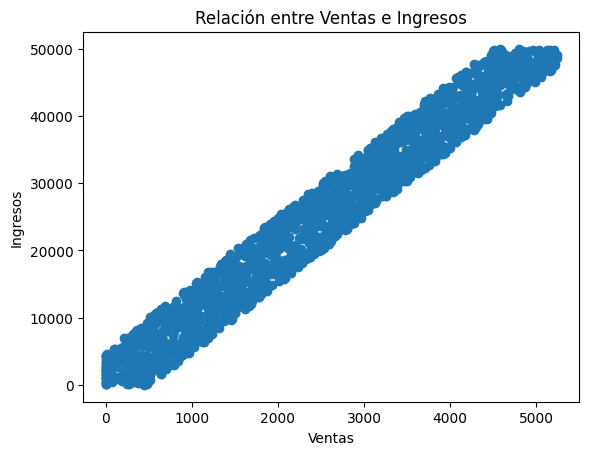

In [ ]:
# Pregunta 11: Gráfico de dispersión
# Supongamos que el DataFrame df tiene dos columnas numéricas llamadas 'revenue' y 'sales'.
# Crea un gráfico de dispersión que muestre la relación entre 'score' y 'sales'.
# Asegúrate de etiquetar los ejes y darle un título al gráfico.

# Importamos la librería necesaria para la visualización
import matplotlib.pyplot as plt

# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Generamos el gráfico de dispersión con 'sales' en el eje x y 'revenue' en el eje y.
ax.scatter(df['sales'], df['revenue'])

# Establecemos las etiquetas de los ejes y el título del gráfico
ax.set_xlabel('Ventas')
ax.set_ylabel('Ingresos')
ax.set_title('Relación entre Ventas e Ingresos')

# Mostramos el gráfico
plt.show()


# Pregunta 12: Histograma
Supongamos que el DataFrame df tiene una columna numérica llamada 'age'.

Crea un histograma que muestre la distribución de la columna 'age'. Asegúrate de etiquetar los ejes y darle un título al gráfico.
Experimenta con diferentes números de bins para obtener la visualización más adecuada.

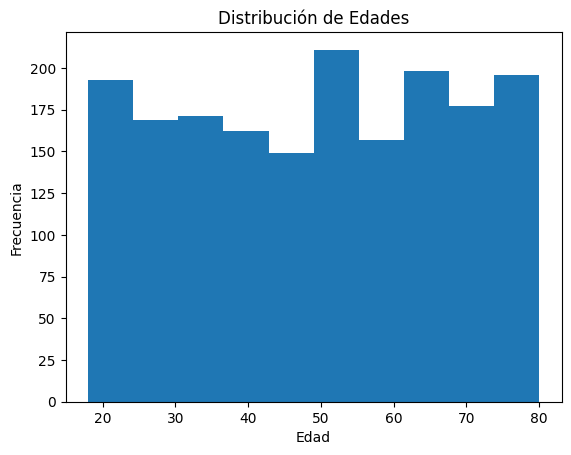

In [ ]:
# Pregunta 12: Histograma
# Supongamos que el DataFrame df tiene una columna numérica llamada 'age'.
# Crea un histograma que muestre la distribución de la columna 'age'.
# Asegúrate de etiquetar los ejes y darle un título al gráfico.
# Experimenta con diferentes números de bins para obtener la visualización más adecuada.

# Importamos la librería necesaria para la visualización
import matplotlib.pyplot as plt

# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Generamos el histograma de la columna 'age', probamos con diferentes bins, por ejemplo, 10, para visualizar de forma más detallada la distribución
ax.hist(df['age'], bins=10)

# Establecemos las etiquetas de los ejes y el título del gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Edades')

# Mostramos el gráfico
plt.show()


# Pregunta 13: Análisis de texto y agregación

Utilizando la columna 'comments' del DataFrame df, encuentra las 10 palabras más frecuentes que aparezcan en los comentarios

In [ ]:
# Pregunta 13: Análisis de texto y agregación
# Utilizando la columna 'comments' del DataFrame df, encuentra las 10 palabras más frecuentes que aparezcan en los comentarios

# Importamos la librería necesaria para el conteo de palabras
from collections import Counter

# Creo una lista vacía para almacenar todas las palabras de los comentarios
word_list = []

# Itero a través de cada comentario en la columna 'comments'
for comment in df['comments']:
    # Separo el comentario en palabras individuales y las añado a la lista de palabras
    word_list.extend(comment.split())

# Utilizo Counter para contar la frecuencia de cada palabra en la lista de palabras
word_count = Counter(word_list)

# Encuentro las 10 palabras más comunes
most_common_words = word_count.most_common(10)

# Imprimo las 10 palabras más comunes
print(most_common_words)


[('apply', 59), ('most', 57), ('although', 55), ('design', 55), ('direction', 53), ('project', 52), ('hundred', 52), ('west', 52), ('executive', 52), ('never', 52)]


# Pregunta 14: Análisis de series temporales

Supongamos que el DataFrame df tiene una columna llamada 'date' con fechas y una columna llamada 'sales' con valores de ventas.

Convierte la columna 'date' en un objeto de tipo datetime y configúralo como el índice del DataFrame df.
Resample el DataFrame df en intervalos semanales y calcula la suma de 'sales' para cada semana.
Calcula y muestra la media móvil de las ventas en un periodo de 4 semanas.

In [ ]:
# Pregunta 14: Análisis de series temporales

# Convierte la columna 'date' en un objeto de tipo datetime y configúralo como el índice del DataFrame df.
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample el DataFrame df en intervalos semanales y calcula la suma de 'sales' para cada semana.
weekly_sales = df['sales'].resample('W').sum()
print("Ventas semanales:\n", weekly_sales.head())

# Calcula y muestra la media móvil de las ventas en un periodo de 4 semanas.
moving_average_sales = weekly_sales.rolling(window=4).mean()
print("Media móvil de ventas en un periodo de 4 semanas:\n", moving_average_sales.head())


Ventas semanales:
 date
2018-04-22      681
2018-04-29     6845
2018-05-06    29957
2018-05-13    10631
2018-05-20    14973
Freq: W-SUN, Name: sales, dtype: int64
Media móvil de ventas en un periodo de 4 semanas:
 date
2018-04-22        NaN
2018-04-29        NaN
2018-05-06        NaN
2018-05-13    12028.5
2018-05-20    15601.5
Freq: W-SUN, Name: sales, dtype: float64


# Pregunta 15: Diferencia entre fechas

Supongamos que el DataFrame df tiene dos columnas llamadas 'start_date' y 'end_date' con fechas en formato "YYYY-MM-DD".

Convierte las columnas 'start_date' y 'end_date' a objetos de tipo datetime.
Calcula la diferencia en días entre 'start_date' y 'end_date' para cada fila y guarda los resultados en una nueva columna llamada 'duration_days'.

In [ ]:
# Pregunta 15: Diferencia entre fechas

# Convierte las columnas 'start_date' y 'end_date' a objetos de tipo datetime.
if 'start_date' in df.columns and 'end_date' in df.columns:
  df['start_date'] = pd.to_datetime(df['start_date'])
  df['end_date'] = pd.to_datetime(df['end_date'])

# Calcula la diferencia en días entre 'start_date' y 'end_date' para cada fila
# y guarda los resultados en una nueva columna llamada 'duration_days'.
  df['duration_days'] = (df['end_date'] - df['start_date']).dt.days
  print(df.head())
else:
    print("Las columnas 'start_date' y/o 'end_date' no existen en el DataFrame.")

Las columnas 'start_date' y/o 'end_date' no existen en el DataFrame.


# Pregunta 16: Agrupación por periodos de tiempo

Supongamos que el DataFrame df tiene una columna llamada 'event_date' con fechas y una columna llamada 'revenue' con valores de ingresos.

Convierte la columna 'event_date' en un objeto de tipo datetime y configúralo como el índice del DataFrame df.
Agrupa el DataFrame df por trimestre (quarter) y calcula la suma de 'revenue' para cada trimestre.
Muestra el resultado en un nuevo DataFrame.

In [ ]:
"""
Pregunta 16: Agrupación por periodos de tiempo

Como parte de este ejercicio, necesito convertir la columna 'event_date' en un objeto de tipo datetime y configurarla como el índice del DataFrame df.
También necesito agrupar el DataFrame df por trimestre (quarter) y calcular la suma de 'revenue' para cada trimestre.
"""

# Primero, verificaré que 'event_date' y 'revenue' estén en mi DataFrame df.
if 'event_date' in df.columns and 'revenue' in df.columns:
    # Ahora, voy a convertir la columna 'event_date' en un objeto de tipo datetime y configurarlo como el índice del DataFrame df.
    df['event_date'] = pd.to_datetime(df['event_date'])
    df = df.set_index('event_date')
    """
    Como el índice de mi DataFrame df es ahora un objeto de tipo datetime, puedo utilizar la función resample() de pandas para agrupar mis datos por trimestre.
    También utilizaré la función sum() para calcular la suma de 'revenue' para cada trimestre.
    """
    quarterly_revenue = df.resample('Q')['revenue'].sum()
    print(quarterly_revenue)
else:
    # Si 'event_date' y/o 'revenue' no están en mi DataFrame, imprimiré un mensaje para informarme de ello.
    print("Las columnas 'event_date' y/o 'revenue' no existen en el DataFrame.")


Las columnas 'event_date' y/o 'revenue' no existen en el DataFrame.
